In [1]:
import pandas as pd
import sklearn
from sklearn.metrics.cluster import adjusted_rand_score

import service
from clustering.KMeans import KMeans
from clustering.KMedoids import KMedoids
from clustering.DBSCAN import DBSCAN

### data_1

In [2]:
df = pd.read_csv('data/data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       10 non-null     int64 
 1   y       10 non-null     int64 
 2   label   10 non-null     object
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [3]:
X, labels = df.drop(columns='label'), df['label']
X.shape, labels.shape

((10, 2), (10,))

In [4]:
X = X[['x', 'y']].to_numpy()

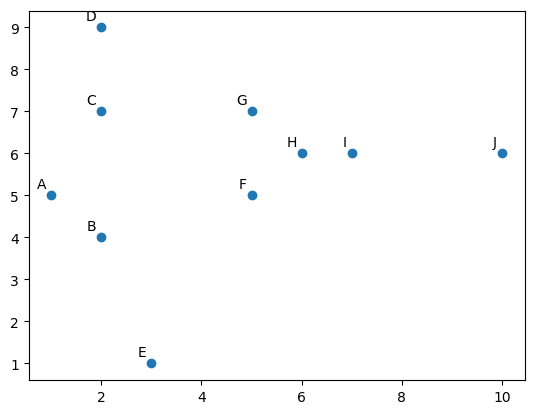

In [5]:
service.plot_raw_data(X, labels)

#### KMeans

In [6]:
n_clusters = 3
init = [[1, 5], [5, 5], [10, 6]]
max_iter = 10
random_state = 42

In [7]:
clusterer = KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [8]:
clusterer.n_iter_

2

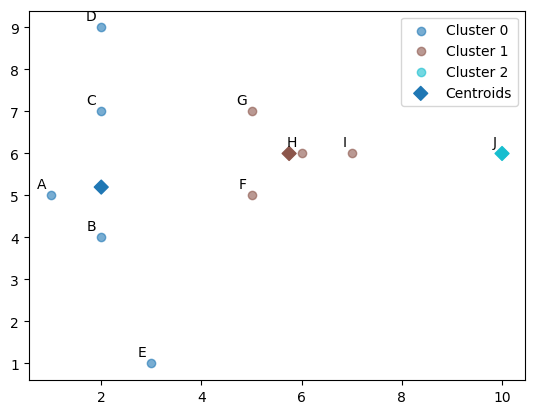

In [9]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

Compare with similar scikit-learn model

In [10]:
sk_clusterer = sklearn.cluster.KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
sk_clusterer.fit(X);

In [11]:
sk_clusterer.n_iter_

2

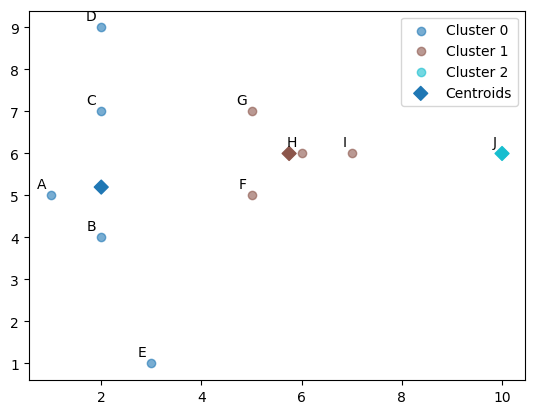

In [12]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
    cluster_centers=sk_clusterer.cluster_centers_,
)

In [13]:
adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_)

1.0

#### KMedoids

In [14]:
n_clusters = 3
init = [[5, 5], [5, 7], [6, 6]]
max_iter = 10
random_state = 42

In [15]:
clusterer = KMedoids(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [16]:
clusterer.n_iter_

2

In [17]:
clusterer.cluster_center_indices_

array([1, 2, 8])

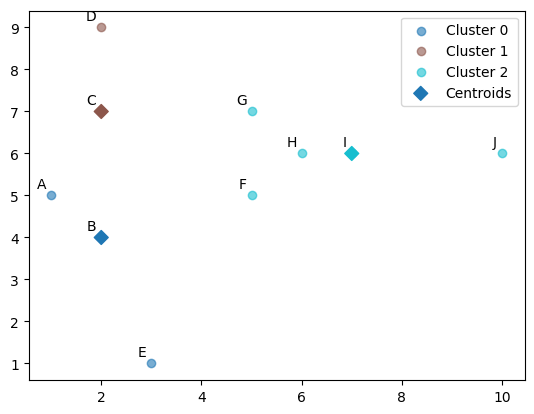

In [18]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

#### DBSCAN

In [19]:
eps = 2
min_samples = 3

In [20]:
clusterer = DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
clusterer.fit(X);

In [21]:
# clusterer.core_sample_indices_

In [22]:
# service.plot_clusters(
#     X,
#     labels=labels,
#     cluster_labels=clusterer.labels_,
# )

Compare with similar scikit-learn model

In [23]:
sk_clusterer = sklearn.cluster.DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
sk_clusterer.fit(X);

In [24]:
sk_clusterer.core_sample_indices_

array([5, 6, 7])

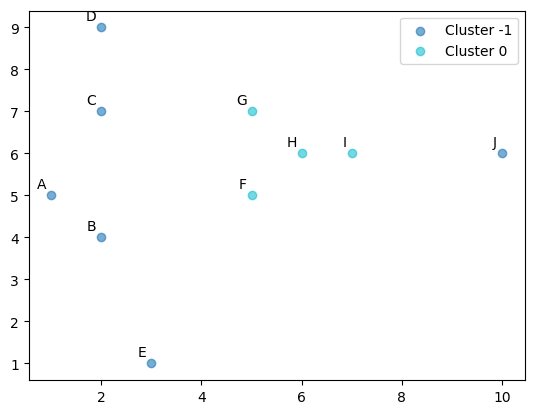

In [25]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

In [26]:
adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_)

AttributeError: 'DBSCAN' object has no attribute 'labels_'

### Check clusterers (scikit-learn)

In [ ]:
clusterers = [
    KMeans(),
    KMedoids(),
    DBSCAN(),
]  # TODO

In [ ]:
from sklearn.utils.estimator_checks import estimator_checks_generator

for clusterer in clusterers:
    total_checks = 0
    skipped_checks = 0  # TODO remove?
    for (estimator, check) in estimator_checks_generator(clusterer):
        total_checks += 1
        check(estimator)
    skipped_percentage = skipped_checks / total_checks * 100
    print(f"{clusterer}: {skipped_checks} out of {total_checks} checks skipped ({skipped_percentage:.2f}%).")